In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [26]:
a = 282e-12
q = 1.602e-19
k = 8.9875517923e9

K = k * q * q

In [34]:
def F(x, xq):
    dx = x - xq
    r2 = dx.dot(dx)
    return K * (x - xq)/math.pow(r2, 1.5)

In [48]:
Cl = [np.array([-a, 0, 0]),
      np.array([0, a, 0]),
      np.array([0, -a, 0]),
      np.array([a, 0, 0]),
      np.array([0, 0, a]),
      np.array([0, 0, -a])]

Na = [np.array([-a, a, 0]),
      np.array([a, a, 0]),
      np.array([-a, -a, 0]),
      np.array([a, -a, 0]),
      np.array([0, a, a]),
      np.array([0, a, -a]),
      np.array([0, -a, a]),
      np.array([0, -a, -a])]

In [49]:
xq = Cl[0]
x = np.array([0.1 * a, 0, 0])
F(x, xq)

array([2.39708173e-09, 0.00000000e+00, 0.00000000e+00])

In [50]:
def fres(x):
    Fres = np.array([0, 0, 0])

    for xq in Cl:
        Fres = Fres + F(x, xq)

    for xq in Na:
        Fres = Fres - F(x, xq)

    return Fres

fres(0.1 * a)[0]

-1.2589335419479845e-10

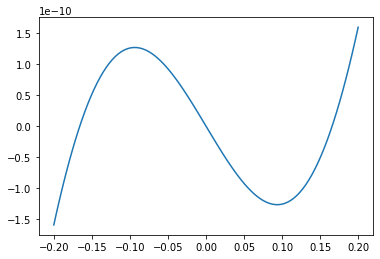

In [55]:
x = np.linspace(-a/5, a/5, 100)
y = np.zeros(100)

for i in range(100):
    y[i] = fres(x[i])[0]

fig, ax = plt.subplots()
pltx = ax.plot(x/a, y)